In [1]:
### for coordinates to distance matrix i have taken the reference from github.com/NQN27/AI-Project

import math
def distance(lat1, lon1, lat2, lon2):
    """
    This function calculates the distance between two points using the Haversine formula.
    """
    # Earth radius in kilometers
    earth_radius = 6371

    # Convert degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Calculate the difference in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in kilometers
    distance = earth_radius * c

    return distance



# Locations data
locations = [
        ("Charbagh", 26.8477, 80.9470),
        ("Raibareli", 26.2325, 81.2331),
        ("Tiloi", 26.1711, 81.2155),
        ("Dewan", 28.6187, 79.8087),
        ("Salon", 26.1522, 81.2830),
        ("Bachrawan", 26.4681, 81.3406),
        ("Shivgarh", 26.2636, 81.3070),
        ("Safedabad", 26.4172, 80.7297),
        ("Haidergarh", 26.7194, 81.1133),
        ("Lalganj", 25.8706, 81.7020),
        ("Alambagh", 26.8462, 80.9331),
        ("Barabanki", 26.9353, 81.1951),
        ("Mohanlalganj", 26.8215, 81.0406),
        ("Ramnagar", 26.5734, 81.3752),
        ("Kaiserbagh", 26.8483, 80.9190),
        ("Barabanki Naya", 26.9255, 81.1934),
        ("Awadh Bus Station (Kamta)", 26.9449, 80.9164),
        ("Fatehpur", 25.9304, 80.8133)
    ]

    # Create an empty distance matrix
distance_matrix = [[0 for _ in range(len(locations))] for _ in range(len(locations))]

    # Calculate distances between all pairs of locations
for i in range(len(locations)):
        for j in range(i + 1, len(locations)):
            lat1, lon1 = locations[i][1:]
            lat2, lon2 = locations[j][1:]
            distance_matrix[i][j] = distance(lat1, lon1, lat2, lon2)
            distance_matrix[j][i] = distance_matrix[i][j]  # Since distance is symmetric

    # Print the distance matrix
print("Distance Matrix (in kilometers):")
print(" | ".join([loc[0] for loc in locations]))
for i in range(len(locations)):
        print("-" * (len(locations) * 10))
        print(" | ".join([str(round(dist, 2)) for dist in distance_matrix[i]]))
print(locations[0])



Distance Matrix (in kilometers):
Charbagh | Raibareli | Tiloi | Dewan | Salon | Bachrawan | Shivgarh | Safedabad | Haidergarh | Lalganj | Alambagh | Barabanki | Mohanlalganj | Ramnagar | Kaiserbagh | Barabanki Naya | Awadh Bus Station (Kamta) | Fatehpur
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0 | 74.09 | 79.84 | 226.56 | 84.25 | 57.55 | 74.17 | 52.52 | 21.82 | 132.15 | 1.39 | 26.46 | 9.73 | 52.34 | 2.78 | 25.92 | 11.23 | 102.86
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
74.09 | 0 | 7.05 | 300.27 | 10.22 | 28.3 | 8.14 | 54.21 | 55.44 | 61.75 | 74.48 | 78.24 | 68.24 | 40.46 | 75.27 | 77.16 | 85.25 | 53.72
--------------------------------------------------------------------------------------------------------------

In [2]:
import math

# Numbering nodes according to the order in the distance matrix
node_labels = {i: f"{locations[i][0]}" for i in range(len(locations))}

# Print node labels
print("Node Labels:")
print(node_labels)


Node Labels:
{0: 'Charbagh', 1: 'Raibareli', 2: 'Tiloi', 3: 'Dewan', 4: 'Salon', 5: 'Bachrawan', 6: 'Shivgarh', 7: 'Safedabad', 8: 'Haidergarh', 9: 'Lalganj', 10: 'Alambagh', 11: 'Barabanki', 12: 'Mohanlalganj', 13: 'Ramnagar', 14: 'Kaiserbagh', 15: 'Barabanki Naya', 16: 'Awadh Bus Station (Kamta)', 17: 'Fatehpur'}


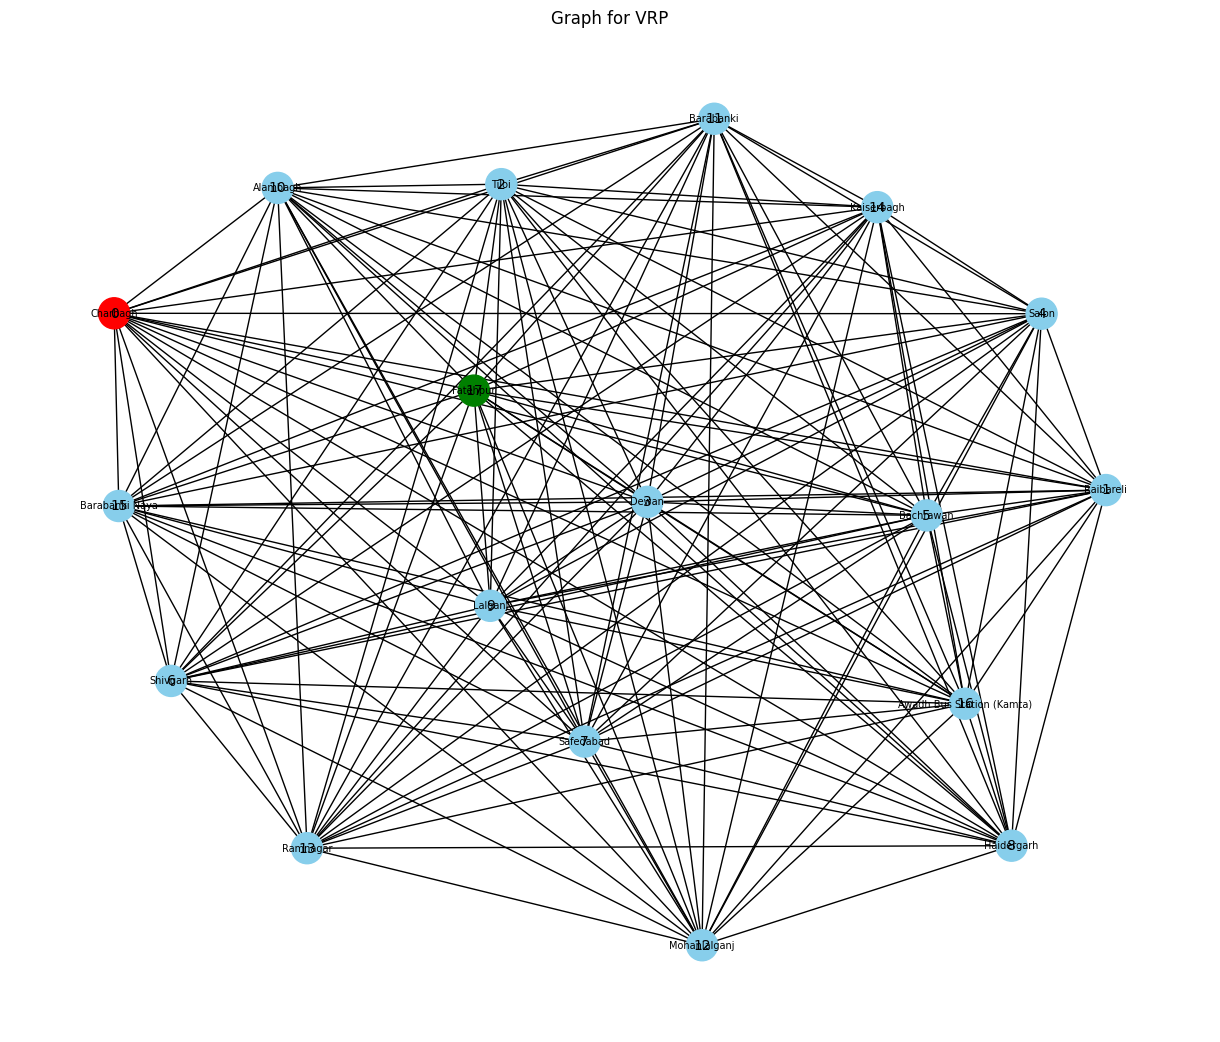

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for i in range(len(locations)):
    G.add_node(i)

# Add edges to the graph based on the distance matrix
for i in range(len(locations)):
    for j in range(i+1, len(locations)):
        G.add_edge(i, j, weight=distance_matrix[i][j])

# Generate plot positions for the nodes
pos = nx.spring_layout(G)

# Define colors for nodes
node_colors = ['red' if node == 0 else 'green' if node == 17 else 'skyblue' for node in G.nodes()]

# Plot the graph with node labels
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=500, node_color=node_colors, font_size=7)

# Add node numbers as labels
for node, (x, y) in pos.items():
    plt.text(x, y, s=str(node), ha='center', va='center', fontsize=10)

plt.title('Graph for VRP')
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

V=[k for k in range(6)] #set of vehivles
#nodes
n=17
C=[ i for i in range(n) if i!=0] # set of customers/bus stops
N=[0]+C+[17] #set of nodes '0'---"charbagh"(depot) '17'-----fatehpur(returning depot)
A=[(i,j) for i in N for j in N if i!=j&i!=11&j!=0] #set of arcs

#demands
np.random.seed(0)
d={n:np.random.randint(10,15) for n in C} # each stop has 10-15 people boarding 
d[0]=0
d[17]=0


#time intervals
#a={0: 0, 10: 60, 14: 120, 12: 180, 16: 240, 8: 300, 15: 360, 11: 420, 13: 480, 7: 540, 5: 600, 1: 660, 6: 720, 2: 780, 4: 840, 17: 1250, 9: 960, 3:1000}
#b={0: 120, 10: 180, 14: 240, 12: 300, 16: 360, 8: 420, 15: 480, 11: 540, 13: 600, 7: 660, 5: 720, 1: 780, 6: 840, 2: 900, 4: 960, 17: 1400, 9: 1080, 3: 1050}
a = {0: 0, 10: 120, 14: 240, 12: 300, 16: 360, 8: 420, 15: 480, 11: 540, 13: 600, 7: 660, 5: 720, 1: 780, 6: 780, 2: 780, 4: 780, 17: 960, 9: 810, 3: 810}
b = {0: 90, 10: 210, 14: 330, 12: 390, 16: 450, 8: 510, 15: 570, 11: 630, 13: 690, 7: 720, 5: 780, 1: 840, 6: 840, 2: 870, 4: 900, 17: 1050, 9: 870, 3: 870}

Q=50 #capacity of each vehicle
D=15000 #operational cost of each vehicle

# {if we want random nodes the use this : ignore this comment
#cordinates of nodes
#X=np.random.rand(len(N))*100
#Y=np.random.rand(len(N))*100
#distances and time
# }
t={(i,j): distance_matrix[i][j] for i in N for j in N if i!=j and i!=17 and j!=0} #assuming unit avg speed
c={(i,j): distance_matrix[i][j]*15 for i in N for j in N if i!=j and i!=17 and j!=0} #15 is the cost per unit distance 

In [5]:
opening_time={}
closing_time={}
print(d)
for i, location in enumerate(locations):
    opening_time[i] ={ str(6 + a[i]//60) +':'+str(a[i]%60)}# Open locations progressively
    closing_time[i]={ str(6 + b[i]//60)+':'+ str(b[i]%60)} # Close after service window duration

print(opening_time)
print(closing_time)    

{1: 14, 2: 10, 3: 13, 4: 13, 5: 13, 6: 11, 7: 13, 8: 12, 9: 14, 10: 10, 11: 10, 12: 14, 13: 12, 14: 11, 15: 10, 16: 11, 0: 0, 17: 0}
{0: {'6:0'}, 1: {'19:0'}, 2: {'19:0'}, 3: {'19:30'}, 4: {'19:0'}, 5: {'18:0'}, 6: {'19:0'}, 7: {'17:0'}, 8: {'13:0'}, 9: {'19:30'}, 10: {'8:0'}, 11: {'15:0'}, 12: {'11:0'}, 13: {'16:0'}, 14: {'10:0'}, 15: {'14:0'}, 16: {'12:0'}, 17: {'22:0'}}
{0: {'7:30'}, 1: {'20:0'}, 2: {'20:30'}, 3: {'20:30'}, 4: {'21:0'}, 5: {'19:0'}, 6: {'20:0'}, 7: {'18:0'}, 8: {'14:30'}, 9: {'20:30'}, 10: {'9:30'}, 11: {'16:30'}, 12: {'12:30'}, 13: {'17:30'}, 14: {'11:30'}, 15: {'15:30'}, 16: {'13:30'}, 17: {'23:30'}}


In [6]:
x_var = [
    (i, j, k) for i in N for j in N for k in V
    if i != j and i != 17 and j != 0  # Filter out invalid combinations
]

s_var=[(i,k) for i in N for k in V ]

import gurobipy as gp
from gurobipy import GRB
m=gp.Model('CVRPTW')

x=m.addVars( x_var,vtype=GRB.BINARY,name="x")
s=m.addVars( s_var,vtype=GRB.CONTINUOUS,name="s")
m.setObjective(gp.quicksum(c[i,j]*x[i,j,k] for i,j,k in x_var)+D*gp.quicksum(x[0,j,k] for j in N for k in V if j!=0),GRB.MINIMIZE)
#fixed cost for each bus

Restricted license - for non-production use only - expires 2025-11-24


In [7]:
# CONSTRAINTS

# 1. vehicle leaves the depot (node 0) exactly once
m.addConstrs(gp.quicksum(x[0, j, k] for j in N if j != 0) <= 1 for k in V)

# 2. vehicle returns to the depot (node 11) exactly once
m.addConstrs(gp.quicksum(x[i, 17, k] for i in N if i != 17) <= 1 for k in V)

# 3. Each customer is visited exactly once
m.addConstrs(gp.quicksum(x[i, j, k] for j in N for k in V if i != j and j != 0) == 1 for i in C)

# 4. Flow conservation at each customer
m.addConstrs(
    (gp.quicksum(x[i, h, k] for i in N if h != i and i != 17) 
    - gp.quicksum(x[h, j, k] for j in N if h != j and j != 0)) == 0
    for h in C for k in V
)

# 5. Vehicle capacity constraints
m.addConstrs(
    gp.quicksum(d[i] * gp.quicksum(x[i, j, k] for j in N if i != j and j != 0) for i in C) <= Q
    for k in V
)

# 6. Time window constraints 
M = 10000  # large value

m.addConstrs(s[i, k] + t[i, j] - M * (1 - x[i, j, k]) <= s[j, k]
    for i in N for j in N for k in V if i != j and i != 17 and j!=0)


# 7. Service time at each node must be within its time window
m.addConstrs(s[i, k] >= a[i] for i in N for k in V if i != 17)  # Exclude depot from time windows
m.addConstrs(s[i, k] <= b[i] for i in N for k in V if i != 17)
#additional
m.addConstr(gp.quicksum(x[0,j,k] for j in N for k in V if j!=0)<=len(V))


<gurobi.Constr *Awaiting Model Update*>

In [8]:
m.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 1973 rows, 1746 columns and 11568 nonzeros
Model fingerprint: 0x0ea13991
Variable types: 108 continuous, 1638 integer (1638 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [2e+01, 2e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Presolve removed 1663 rows and 732 columns
Presolve time: 0.05s
Presolved: 310 rows, 1014 columns, 4344 nonzeros
Variable types: 84 continuous, 930 integer (930 binary)
Found heuristic solution: objective 111628.21955

Root relaxation: objective 4.371831e+04, 294 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Ga

In [9]:
print("OBJECTIVE: ",str(round(m.ObjVal,2)))
for v in m.getVars():
    if v.x>0.9:
        print(str(v.VarName)+"="+str(v.x))

OBJECTIVE:  76212.83
x[0,8,5]=1.0
x[0,10,0]=1.0
x[0,12,2]=1.0
x[0,13,1]=1.0
x[1,2,1]=1.0
x[2,17,1]=1.0
x[3,17,0]=1.0
x[4,9,5]=1.0
x[5,1,1]=1.0
x[6,4,5]=1.0
x[7,17,2]=1.0
x[8,6,5]=1.0
x[9,17,5]=1.0
x[10,14,0]=1.0
x[11,15,2]=1.0
x[12,11,2]=1.0
x[13,5,1]=1.0
x[14,16,0]=1.0
x[15,7,2]=1.0
x[16,3,0]=1.0
s[1,0]=780.0
s[1,1]=780.0
s[1,2]=780.0
s[1,3]=780.0
s[1,4]=780.0
s[1,5]=780.0
s[2,0]=780.0
s[2,1]=870.0
s[2,2]=780.0
s[2,3]=780.0
s[2,4]=780.0
s[2,5]=780.0
s[3,0]=810.0
s[3,1]=810.0
s[3,2]=810.0
s[3,3]=810.0
s[3,4]=810.0
s[3,5]=810.0
s[4,0]=780.0
s[4,1]=780.0
s[4,2]=780.0
s[4,3]=780.0
s[4,4]=780.0
s[4,5]=792.6163954249569
s[5,0]=720.0
s[5,1]=720.0
s[5,2]=720.0
s[5,3]=720.0
s[5,4]=720.0
s[5,5]=720.0
s[6,0]=780.0
s[6,1]=780.0
s[6,2]=780.0
s[6,3]=780.0
s[6,4]=780.0
s[6,5]=780.0
s[7,0]=660.0
s[7,1]=660.0
s[7,2]=660.0
s[7,3]=660.0
s[7,4]=660.0
s[7,5]=660.0
s[8,0]=420.0
s[8,1]=420.0
s[8,2]=420.0
s[8,3]=420.0
s[8,4]=420.0
s[8,5]=420.0
s[9,0]=810.0
s[9,1]=810.0
s[9,2]=810.0
s[9,3]=810.0
s[9,4]=810.0


In [10]:
import numpy as np

def get_routes(x, N):
  """
  Extracts routes and assigned trucks from the Gurobi decision variables,
  ensuring routes start from node 0 and end at node 11.

  Args:
      x: A dictionary or NumPy array representing Gurobi decision variables
          (typically with keys like (0, i, k) for vehicle k traveling from 0 to i).
      N: A list or NumPy array representing nodes (including the depot).

  Returns:
      routes: A list of lists, where each inner list represents a route
              (including the depot as the first and last node).
      trucks: A list of integers representing the vehicle assigned to each route.
  """

  routes = []
  trucks = []

  # Iterate through vehicles (assuming consecutive integer indices)
  for k in V:
    aux = [0]  # Start with the depot
    visited = set([0])  # Track visited nodes to avoid cycles

    # Efficiently find the first visited customer
    for i in N[1:-1]:  # Exclude depot (0) and dummy node (11)
      if x[(0, i, k)].x > 0.9:  # Significant assignment to route
        aux.append(i)
        visited.add(i)
        break

    # Follow the route using a backtracking approach
    while len(aux) > 1 and aux[-1] != 17 and not (len(aux) == 2 and aux[0] == aux[-1]):
      current = aux[-1]
      for j in N:
        if j != current and j!=0 and x[(current, j, k)].x > 0.9 and j not in visited:
          aux.append(j)
          visited.add(j)
          break

    # Ensuring a complete route (starts from 0 and ends at 11)
    if len(aux) > 2 and aux[0] == 0 and aux[-1] == 17:  # Check for valid start and end
      routes.append(aux)
      trucks.append(k)

  return routes, trucks


In [11]:
#for routes
routes, buses = get_routes(x, N)

print("Routes:")
print(routes)
print("\nBuses:")
print(buses)


Routes:
[[0, 10, 14, 16, 3, 17], [0, 13, 5, 1, 2, 17], [0, 12, 11, 15, 7, 17], [0, 8, 6, 4, 9, 17]]

Buses:
[0, 1, 2, 5]


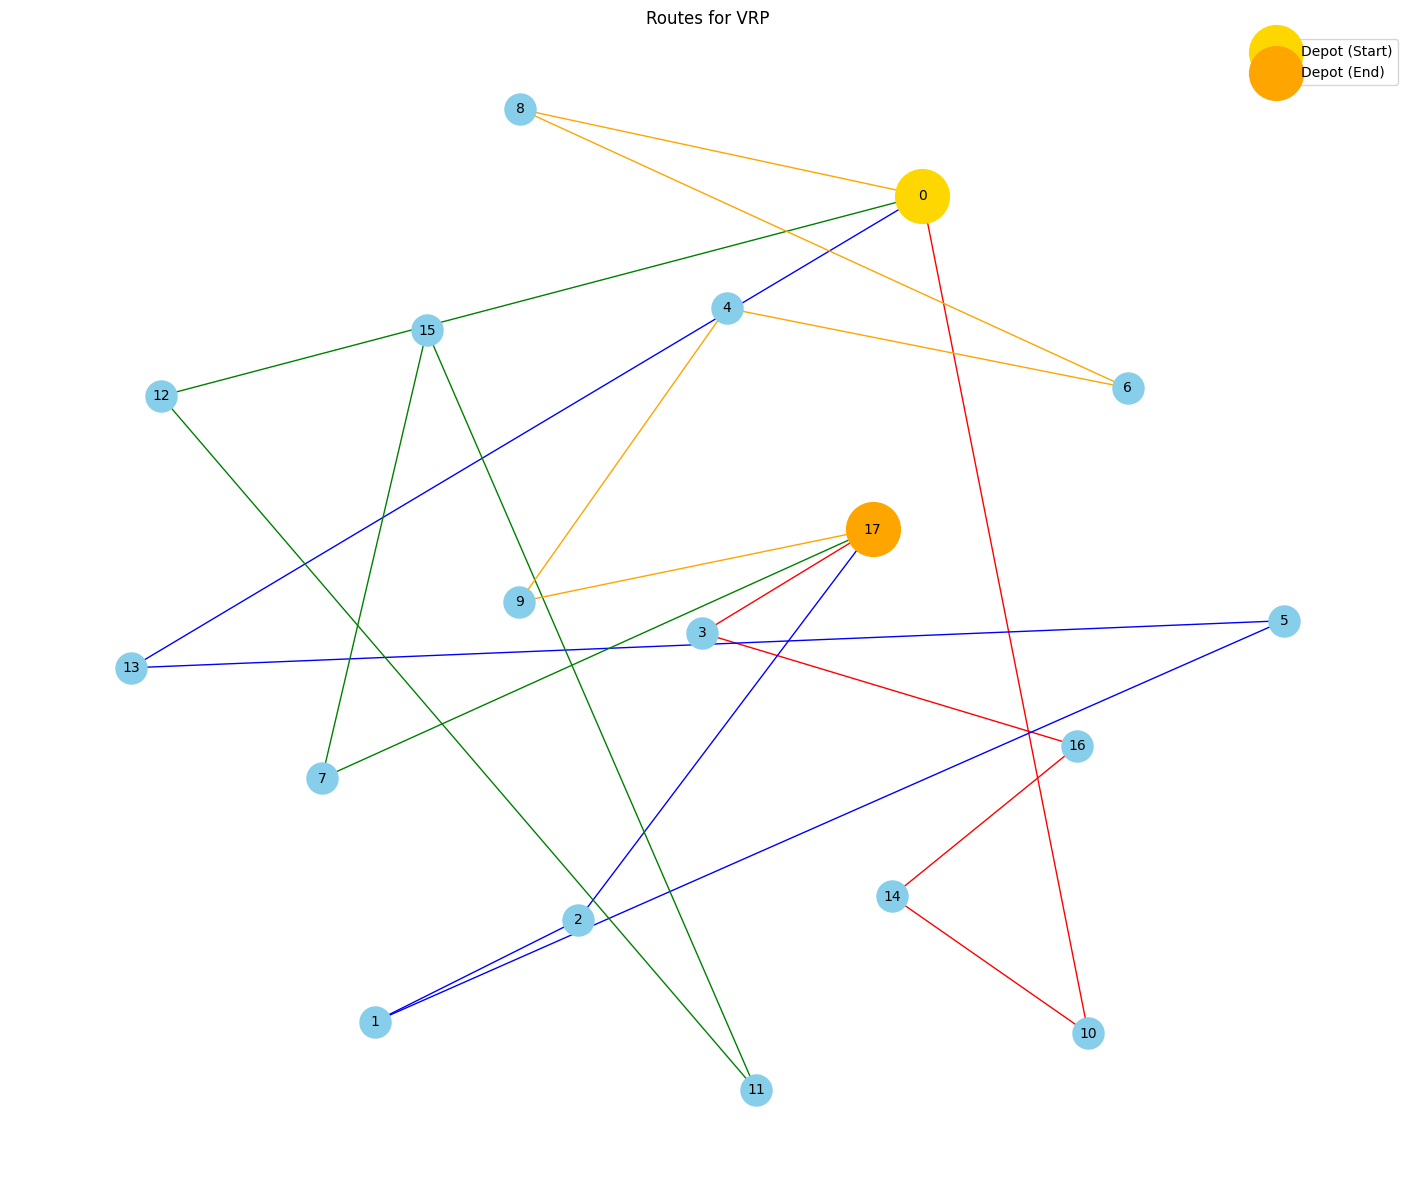

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Define colors for each route
route_colors = ['red', 'blue', 'green', 'orange', 'purple','black']

# Create an undirected graph
G = nx.Graph()

# Add nodes to the graph
for i in range(len(locations)):
    G.add_node(i)

# Add edges to the graph based on the distance matrix
for i in range(len(locations)):
    for j in range(i+1, len(locations)):
        G.add_edge(i, j, weight=distance_matrix[i][j])

# Generate plot positions for the nodes with increased scale
pos = nx.spring_layout(G, scale=3)

# Plot the graph without default black lines
plt.figure(figsize=(18, 15))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')

# Add depots (color them differently)
nx.draw_networkx_nodes(G, pos, nodelist=[0], node_size=1500, node_color='gold', label='Depot (Start)')
nx.draw_networkx_nodes(G, pos, nodelist=[17], node_size=1500, node_color='orange', label='Depot (End)')

# Add undirected edges for each route with specified colors
for route, color in zip(routes, route_colors):
    nx.draw_networkx_edges(G, pos, edgelist=[(route[i], route[i+1]) for i in range(len(route)-1)], edge_color=color)

# Add node numbers as labels
for node, (x, y) in pos.items():
    plt.text(x, y, s=str(node), ha='center', va='center', fontsize=10)

plt.title('Routes for VRP')
plt.legend()
plt.axis('off')  # Turn off axis
plt.show()
